# More on Missing Data - Lab

## Introduction

In this lab, you'll continue to practice techniques for dealing with missing data. Moreover, you'll observe the impact on distributions of your data produced by various techniques for dealing with missing data.

## Objectives

In this lab you will: 

- Evaluate and execute the best strategy for dealing with missing, duplicate, and erroneous values for a given dataset   
- Determine how the distribution of data is affected by imputing values 

## Load the data

To start, load the dataset `'titanic.csv'` using pandas.

In [1]:
# Your code here
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv('titanic.csv')

Use the `.info()` method to quickly preview which features have missing data

In [3]:
# Your code here
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1391 entries, 0 to 1390
Data columns (total 12 columns):
PassengerId    1391 non-null float64
Survived       1391 non-null float64
Pclass         1391 non-null object
Name           1391 non-null object
Sex            1391 non-null object
Age            1209 non-null float64
SibSp          1391 non-null float64
Parch          1391 non-null float64
Ticket         1391 non-null object
Fare           1391 non-null float64
Cabin          602 non-null object
Embarked       1289 non-null object
dtypes: float64(6), object(6)
memory usage: 130.5+ KB


## Observe previous measures of centrality

Let's look at the `'Age'` feature. Calculate the mean, median, and standard deviation of this feature. Then plot a histogram of the distribution.

In [4]:
# Your code here
age_mean = df['Age'].mean()
print(f'The age mean is {age_mean}')
age_median = df['Age'].median()
print(f'The age median is {age_median}')
age_std = df['Age'].std()
print(f'The age std is {age_std}')

The age mean is 29.731894127378
The age median is 27.0
The age std is 16.0701246034447


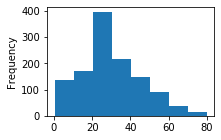

In [5]:
df['Age'].plot(kind='hist', bins=8, figsize=(3,2))

## Impute missing values using the mean 

Fill the missing `'Age'` values using the average age. (Don't overwrite the original data, as we will be comparing to other methods for dealing with the missing values.) Then recalculate the mean, median, and std and replot the histogram.

In [6]:
# Your code here
mean_age_df = df.copy()
mean_age_df['Age'].fillna(age_mean, inplace=True)

In [7]:
new_age_mean = mean_age_df['Age'].mean()
print(f'The age mean is {new_age_mean}')
new_age_median = mean_age_df['Age'].median()
print(f'The age median is {new_age_median}')
new_age_std = mean_age_df['Age'].std()
print(f'The age std is {new_age_std}')

The age mean is 29.731894127377995
The age median is 29.731894127378
The age std is 14.98115547604539


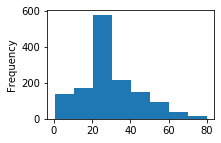

In [8]:
plt.figure()
mean_age_df['Age'].plot(kind='hist', bins=8, figsize=(3,2))

### Commentary

Note that the standard deviation dropped, the median was slightly raised and the distribution has a larger mass near the center.

## Impute missing values using the median 

Fill the missing `'Age'` values, this time using the media age. (Again, don't overwrite the original data, as we will be comparing to other methods for dealing with the missing values.) Then recalculate the mean, median, and std and replot the histogram.

In [9]:
# Your code here
median_age_df = df.copy()
median_age_df['Age'].fillna(age_median, inplace=True)

In [10]:
age_median

27.0

In [11]:
median_new_age_mean = median_age_df['Age'].mean()
print(f'The age mean is {median_new_age_mean}')
median_new_age_median = median_age_df['Age'].median()
print(f'The age median is {median_new_age_median}')
median_new_age_std = median_age_df['Age'].std()
print(f'The age std is {median_new_age_std}')

The age mean is 29.37445003594536
The age median is 27.0
The age std is 15.009475778073455


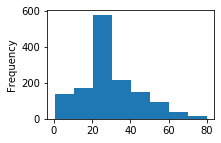

In [12]:
plt.figure()
median_age_df['Age'].plot(kind='hist', bins=8, figsize=(3,2))

### Commentary

Imputing the median has similar effectiveness to imputing the mean. The variance is reduced, while the mean is slightly lowered. You can once again see that there is a larger mass of data near the center of the distribution.

## Dropping rows

Finally, let's observe the impact on the distribution if we were to simply drop all of the rows that are missing an age value. Then, calculate the mean, median and standard deviation of the ages along with a histogram, as before.

In [13]:
# Your code here
drop_df = df.copy()

In [14]:
drop_age_mean = drop_df['Age'].mean()
print(f'The age mean is {drop_age_mean}')
drop_age_median = drop_df['Age'].median()
print(f'The age median is {drop_age_median}')
drop_age_std = drop_df['Age'].std()
print(f'The age std is {drop_age_std}')

The age mean is 29.731894127378
The age median is 27.0
The age std is 16.0701246034447


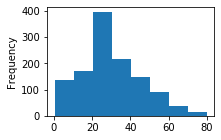

In [16]:
plt.figure()
drop_df['Age'].plot(kind='hist', bins=8, figsize=(3,2))

### Commentary

Dropping missing values leaves the distribution and associated measures of centrality unchanged, but at the cost of throwing away data.

## Summary

In this lab, you briefly practiced some common techniques for dealing with missing data. Moreover, you observed the impact that these methods had on the distribution of the feature itself. When you begin to tune models on your data, these considerations will be an essential process of developing robust and accurate models.